In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import transforms
import astropy.constants as const
import pandas as pd
import cmcrameri.cm as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [2]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [4]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [5]:
df1 = pd.read_excel("../../sav/EIS/NPCHDB/npchdb_fitres.xlsx",sheet_name="r1")
df1 = df1[df1["quality"] == "a"]
df1["Z2A"] = df1["Z"]/df1["A"]
df1["ion"] = df1["ion"].str.strip()
df1["charge_state"] = df1["charge_state"].str.strip()
df1["fwhm_true_err"] = df1["fwhm_fit"]/(df1["fwhm_true"]*1e-3)*df1["fwhm_err"]*1e3

In [6]:
df2 = pd.read_excel("../../sav/EIS/NPCHDB/npchdb_fitres.xlsx",sheet_name="r2")
df2 = df2[df2["quality"] == "a"]
df2["Z2A"] = df2["Z"]/df2["A"]
df2["ion"] = df2["ion"].str.strip()
df2["charge_state"] = df2["charge_state"].str.strip()
df2["fwhm_true_err"] = df2["fwhm_fit"]/(df2["fwhm_true"]*1e-3)*df2["fwhm_err"]*1e3

In [7]:
df3 = pd.read_excel("../../sav/EIS/NPCHDB/npchdb_fitres.xlsx",sheet_name="r3")
df3 = df3[df3["quality"] == "a"]
df3["Z2A"] = df3["Z"]/df3["A"]
df3["ion"] = df3["ion"].str.strip()
df3["charge_state"] = df3["charge_state"].str.strip()
df3["fwhm_true_err"] = df3["fwhm_fit"]/(df3["fwhm_true"]*1e-3)*df3["fwhm_err"]*1e3

In [8]:
Teff_1 = df1["A"]*amu/(8*np.log(2)*k_B)*(c/(df1["wvl_chianti"]*1e-8))**2*(df1["fwhm_true"]*1e-11)**2
Teff_err_1 = 2*df1["A"]*amu/(8*np.log(2)*k_B)*(c/(df1["wvl_chianti"]*1e-8))**2*(df1["fwhm_true"]*1e-11)*df1["fwhm_true_err"]*1e-11

Teff_2 = df2["A"]*amu/(8*np.log(2)*k_B)*(c/(df2["wvl_chianti"]*1e-8))**2*(df2["fwhm_true"]*1e-11)**2
Teff_err_2 = 2*df2["A"]*amu/(8*np.log(2)*k_B)*(c/(df2["wvl_chianti"]*1e-8))**2*(df2["fwhm_true"]*1e-11)*df2["fwhm_true_err"]*1e-11

Teff_3 = df3["A"]*amu/(8*np.log(2)*k_B)*(c/(df3["wvl_chianti"]*1e-8))**2*(df3["fwhm_true"]*1e-11)**2
Teff_err_3 = 2*df3["A"]*amu/(8*np.log(2)*k_B)*(c/(df3["wvl_chianti"]*1e-8))**2*(df3["fwhm_true"]*1e-11)*df3["fwhm_true_err"]*1e-11

In [9]:
line_name = df1["ion"] + r" \textsc{"+ df1["charge_state"] + r"}"
df_ion = df1[["ion","charge_state","Z","A","Z2A"]]
df_ion = df_ion.drop_duplicates()
ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_state"] + r"}}"

In [10]:
PaMIS_veff = np.array([40.05, 45.14, 47.03])
PaMIS_veff_err = np.array([0.58, 1.47, 3.27])
PaMIS_Teff = 55.85*amu/2/k_B*(PaMIS_veff*1e5)**2
PaMIS_Teff_err = 2*55.85*amu/2/k_B*(PaMIS_veff*1e5)*(PaMIS_veff_err*1e5)
PaMIS_Z2A = np.array([9,9,9])/np.array([55.85,55.85,55.85])

In [11]:
def veff2teff(veff):
    return 55.85*const.u.cgs.value*(veff*1e5)**2/2/const.k_B.cgs.value/1e6

def teff2veff(teff):
    return np.sqrt(2*const.k_B.cgs.value*teff*1e6/(55.85*const.u.cgs.value))/1e5

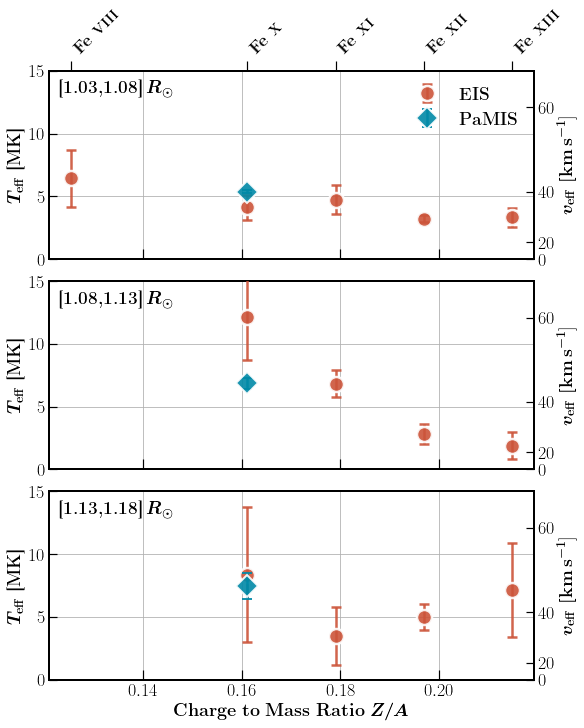

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,10),constrained_layout=True,sharex=True)

ax1.errorbar(df1["Z2A"].values, Teff_1.values/1e6, Teff_err_1.values/1e6, color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax1.errorbar(PaMIS_Z2A[0], PaMIS_Teff[0]/1e6, PaMIS_Teff_err[0]/1e6, color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{PaMIS}",zorder=16,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax2.errorbar(df2["Z2A"].values, Teff_2.values/1e6, Teff_err_2.values/1e6, color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax2.errorbar(PaMIS_Z2A[1], PaMIS_Teff[1]/1e6, PaMIS_Teff_err[1]/1e6, color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{PaMIS}",zorder=16,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax3.errorbar(df3["Z2A"].values, Teff_3.values/1e6, Teff_err_3.values/1e6, color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax3.errorbar(PaMIS_Z2A[2], PaMIS_Teff[2]/1e6, PaMIS_Teff_err[2]/1e6, color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{PaMIS}",zorder=16,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)



ax_ion = ax1.secondary_xaxis(location="top")
# ax_ion.set_xlim(ax1.get_xlim())
ax_ion.set_xticks(df_ion["Z2A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

ax1.legend(loc="upper right",fontsize=18,frameon=False) 
ax1.text(0.02,0.95,r"\textbf{[1.03,1.08]}\,$\boldsymbol{R_\odot}$",va="top",ha="left",
         transform=ax1.transAxes,fontsize=18)

ax2.text(0.02,0.95,r"\textbf{[1.08,1.13]}\,$\boldsymbol{R_\odot}$",va="top",ha="left",
         transform=ax2.transAxes,fontsize=18)

ax3.text(0.02,0.95,r"\textbf{[1.13,1.18]}\,$\boldsymbol{R_\odot}$",va="top",ha="left",
         transform=ax3.transAxes,fontsize=18)


for ax_ in (ax1,ax2,ax3):
    ax_.grid("on")
    ax_.set_ylim(bottom=0,top=15)
    ax_.tick_params(labelsize=18,direction="in",which="both",top=False)
    ax_.set_ylabel(r"$\boldsymbol{T_{\rm eff}}$ \textbf{[MK]}",fontsize=18)
    ax_veff_ = ax_.secondary_yaxis(location="right", functions=(teff2veff,veff2teff))
    ax_veff_.tick_params(labelsize=18,direction="in")
    ax_veff_.set_ylabel(r"$\boldsymbol{v_{\rm eff}\ [\mathrm{km\,s^{-1}}}]$",fontsize=18)

ax3.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)


plt.savefig(fname="../../figs/ms/Teff_NPCHDB.pdf",dpi=300,format="pdf",bbox_inches="tight")